# CODING TASK #1: IMPORT LIBRARIES/DATASETS

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Read the CSV file 
university_df = pd.read_csv("university_admission.csv")

In [ ]:
# Load the top 6 instances
university_df.head(6)

GRE_Score  TOEFL_Score  University_Rating  SOP  LOR  CGPA  Research  \
0        337          118                  4  4.5  4.5  9.65         1   
1        324          107                  4  4.0  4.5  8.87         1   
2        316          104                  3  3.0  3.5  8.00         1   
3        322          110                  3  3.5  2.5  8.67         1   
4        314          103                  2  2.0  3.0  8.21         0   
5        330          115                  5  4.5  3.0  9.34         1   

   Chance_of_Admission  
0                 0.92  
1                 0.76  
2                 0.72  
3                 0.80  
4                 0.65  
5                 0.90

In [ ]:
# Load the bottom 6 instances 
university_df.tail(6)

GRE_Score  TOEFL_Score  University_Rating  SOP  LOR  CGPA  Research  \
994        301           99                  3  2.5  2.0  8.45         1   
995        332          108                  5  4.5  4.0  9.02         1   
996        337          117                  5  5.0  5.0  9.87         1   
997        330          120                  5  4.5  5.0  9.56         1   
998        312          103                  4  4.0  5.0  8.43         0   
999        327          113                  4  4.5  4.5  9.04         0   

     Chance_of_Admission  
994                 0.68  
995                 0.87  
996                 0.96  
997                 0.93  
998                 0.73  
999                 0.84

In [ ]:
# Display the feature columns
university_df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admission'],
      dtype='object')

In [ ]:
# Check the shape of the dataframe
university_df.shape

(1000, 8)

In [ ]:
# Check if any missing values are present in the dataframe
university_df.isnull().sum()

GRE_Score              0
TOEFL_Score            0
University_Rating      0
SOP                    0
LOR                    0
CGPA                   0
Research               0
Chance_of_Admission    0
dtype: int64

In [ ]:
# university_df = university_df.dropna()

In [ ]:
university_df.dtypes

GRE_Score                int64
TOEFL_Score              int64
University_Rating        int64
SOP                    float64
LOR                    float64
CGPA                   float64
Research                 int64
Chance_of_Admission    float64
dtype: object

**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
- **What is highest, average and lowest TOEFL score in this dataset?**

GRE_Score  TOEFL_Score  University_Rating          SOP          LOR  \
count  1000.000000  1000.000000        1000.000000  1000.000000  1000.000000   
mean    316.472000   107.193000           3.114000     3.374000     3.484000   
std      11.289494     6.079368           1.142939     0.990507     0.924986   
min     290.000000    92.000000           1.000000     1.000000     1.000000   
25%     308.000000   103.000000           2.000000     2.500000     3.000000   
50%     317.000000   107.000000           3.000000     3.500000     3.500000   
75%     325.000000   112.000000           4.000000     4.000000     4.000000   
max     340.000000   120.000000           5.000000     5.000000     5.000000   

             CGPA     Research  Chance_of_Admission  
count  1000.00000  1000.000000           1000.00000  
mean      8.57644     0.560000              0.72174  
std       0.60451     0.496635              0.14107  
min       6.80000     0.000000              0.34000  
25%       8.12750     0.000000              0.63000  
50%       8.56000     1.000000              0.72000  
75%       9.04000     1.000000              0.82000  
max       9.92000     1.000000              0.97000

# CODING TASK #2: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

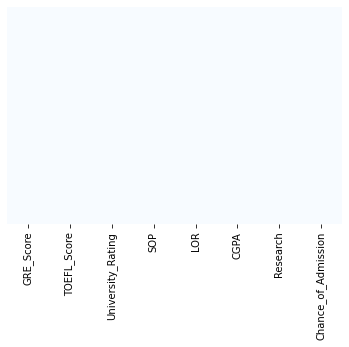

In [ ]:
# check if there are any Null values
sns.heatmap(university_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

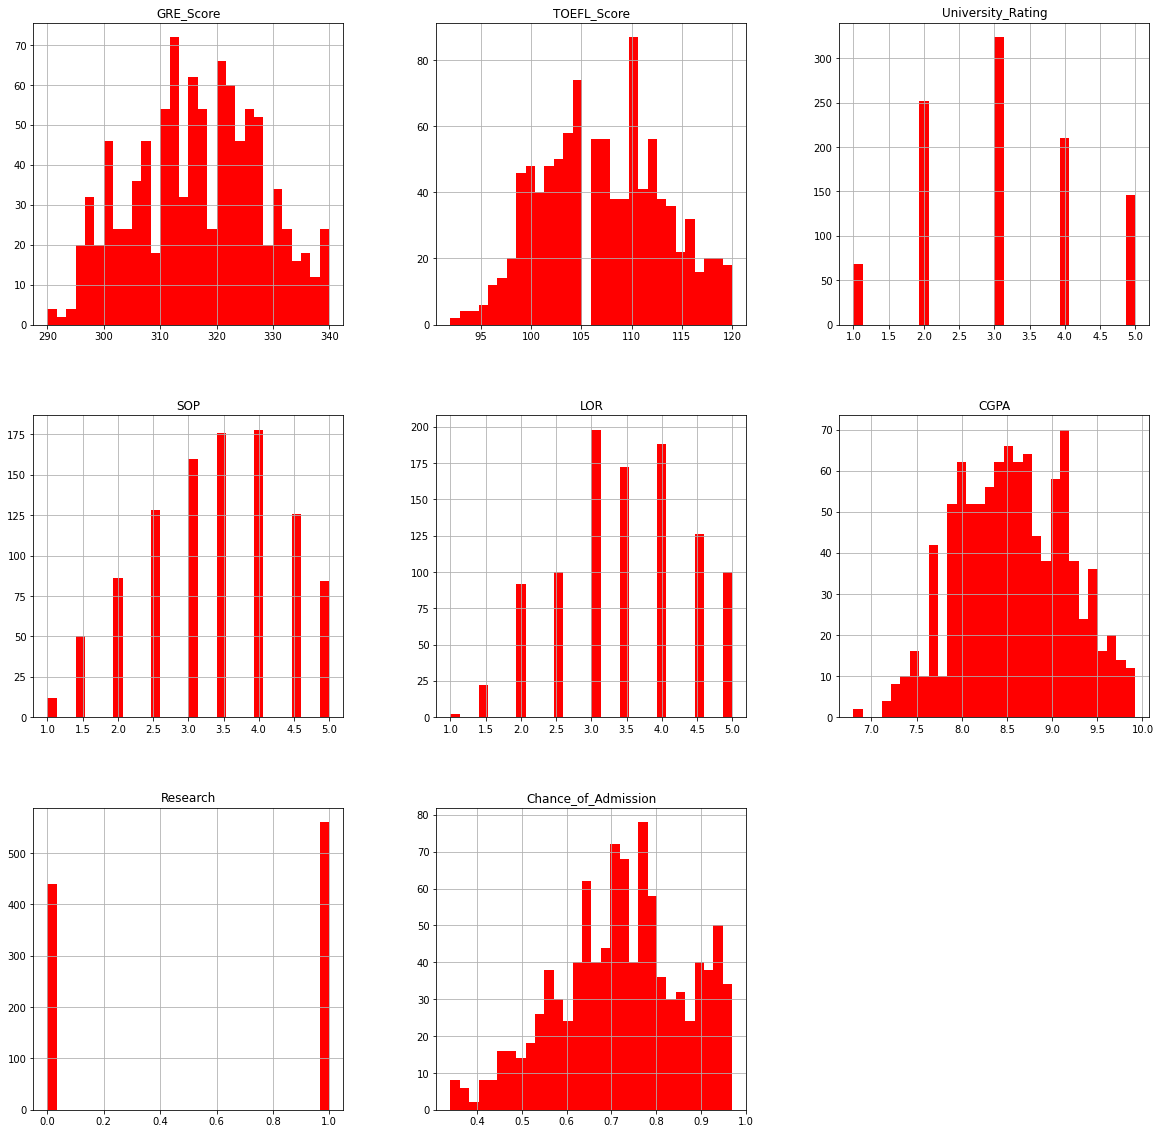

In [ ]:
university_df.hist(bins = 30, figsize = (20,20), color = 'r');
plt.show()

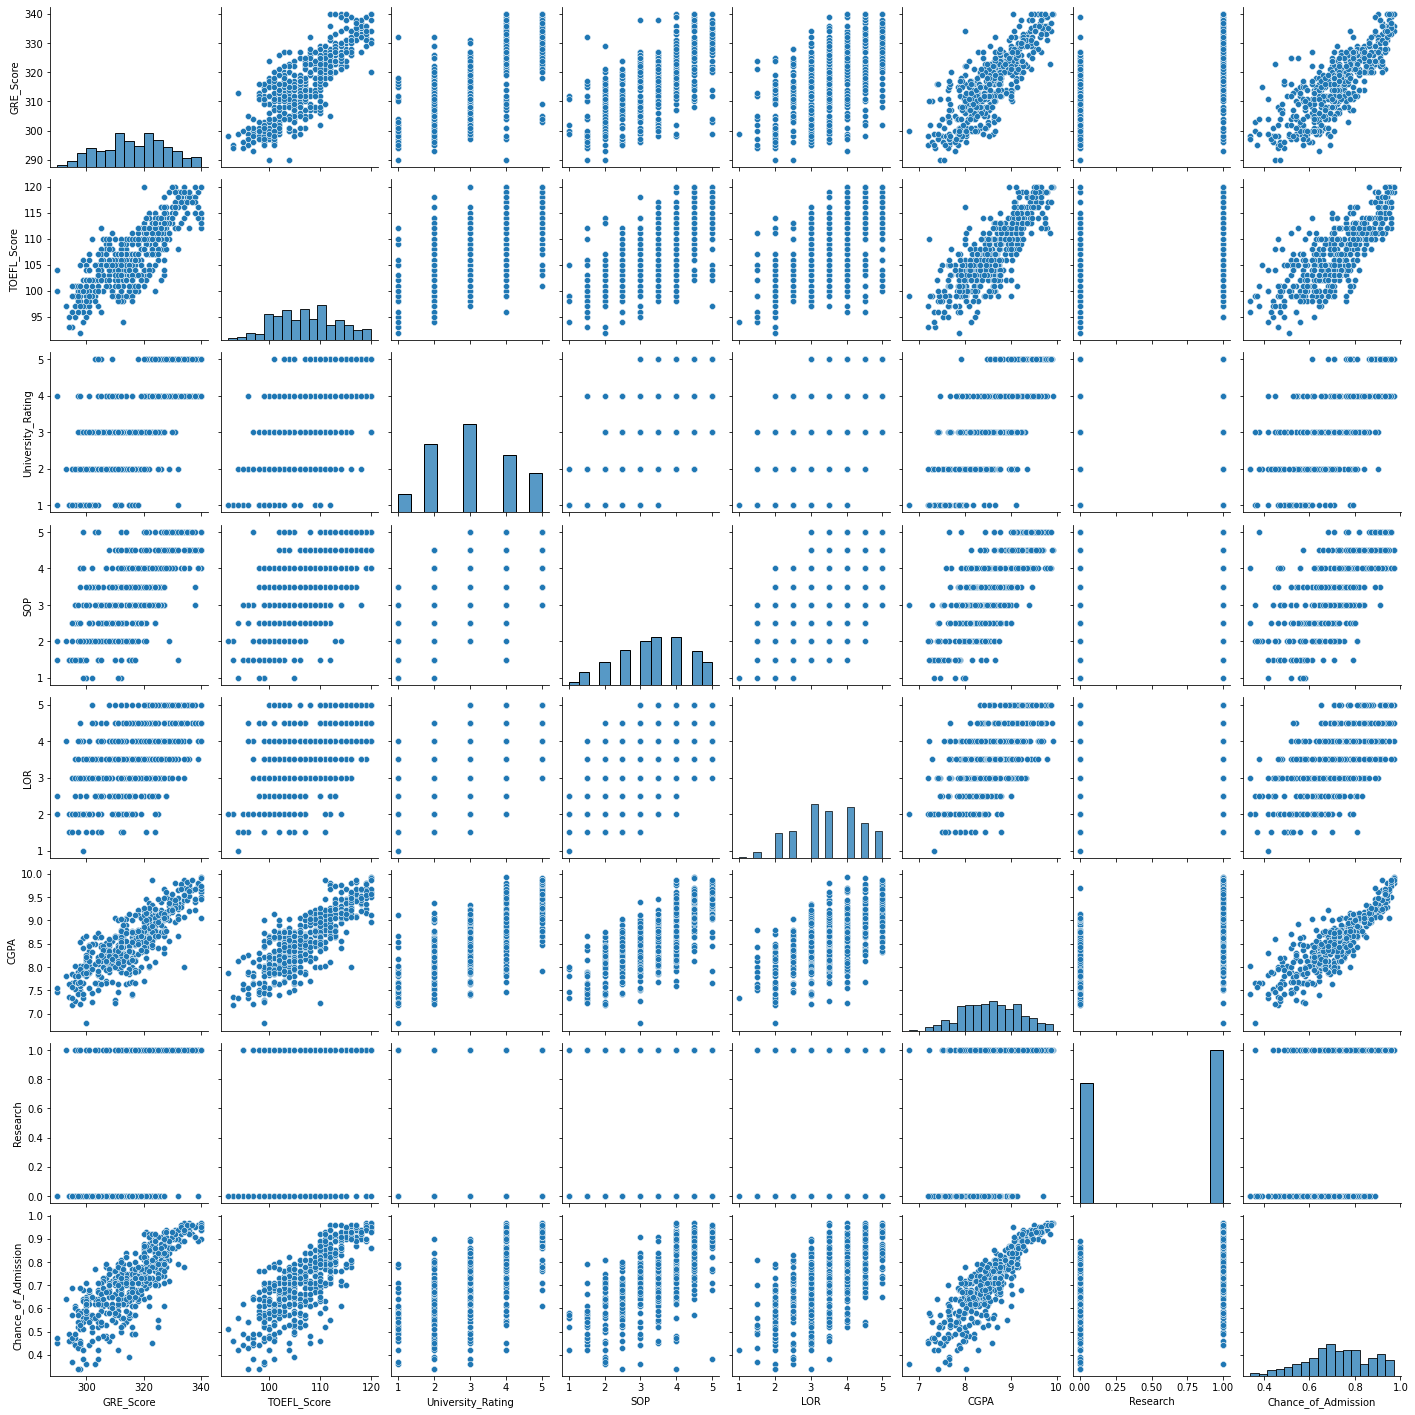

In [ ]:
sns.pairplot(university_df)
plt.show()

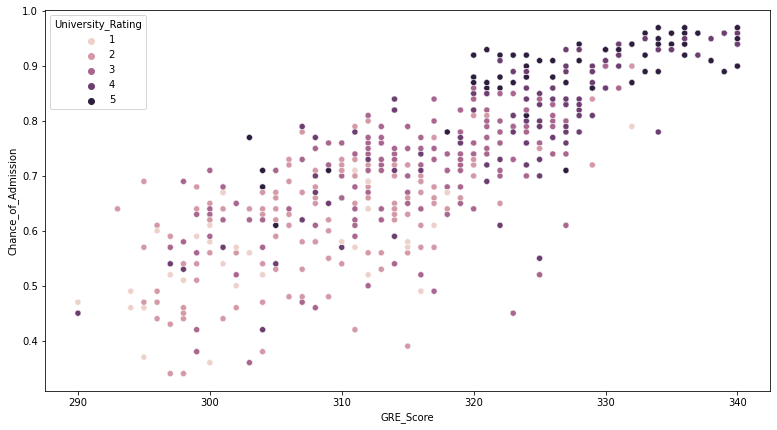

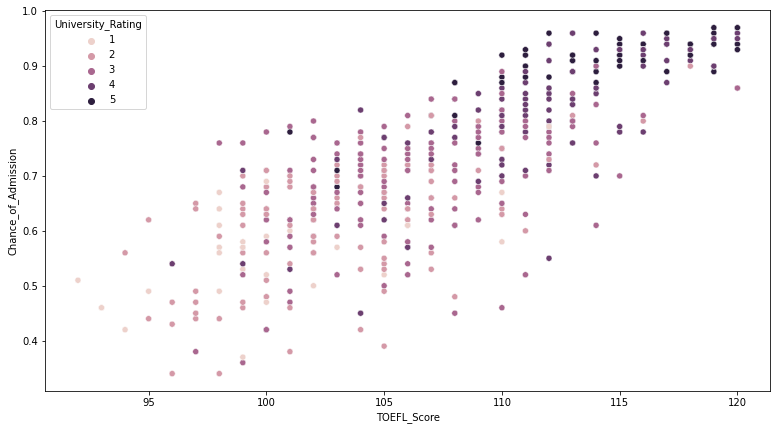

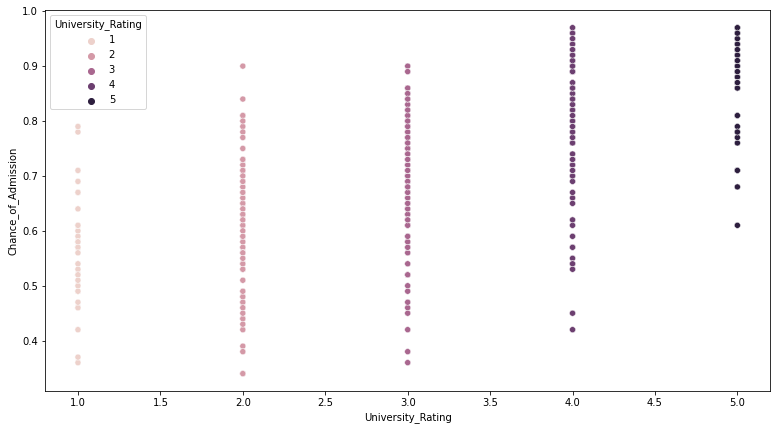

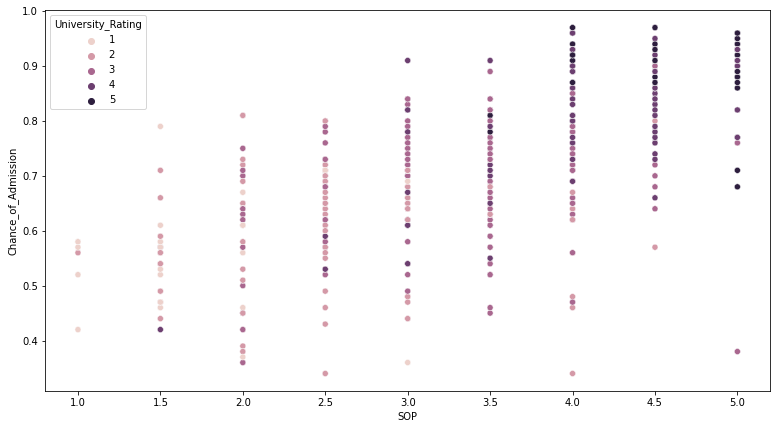

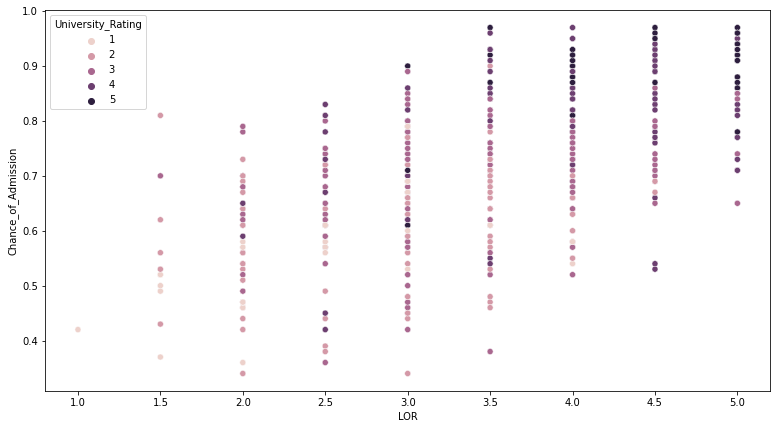

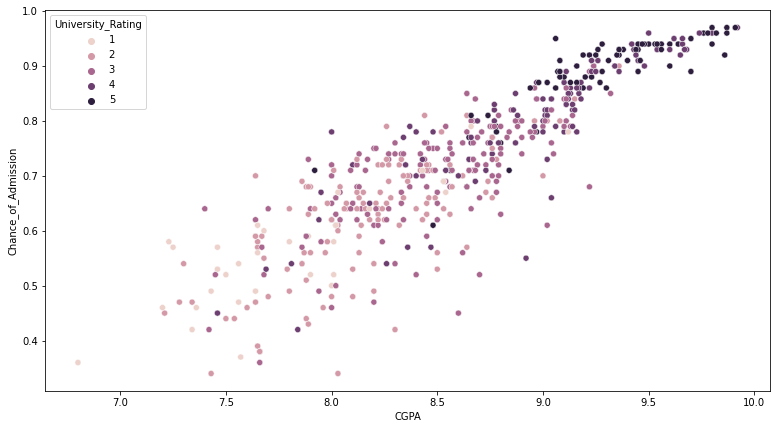

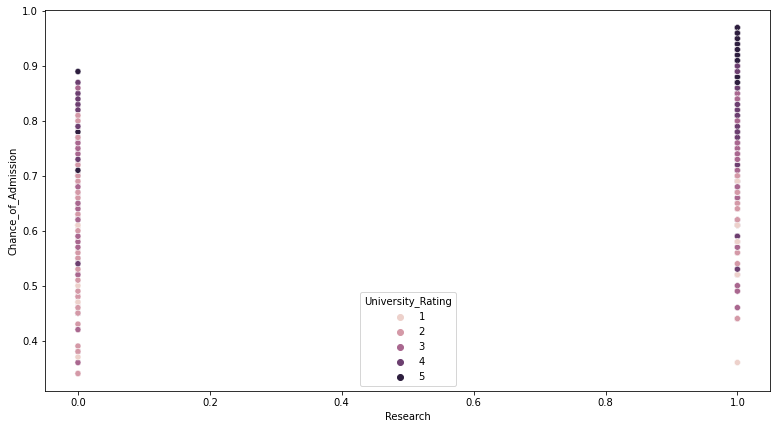

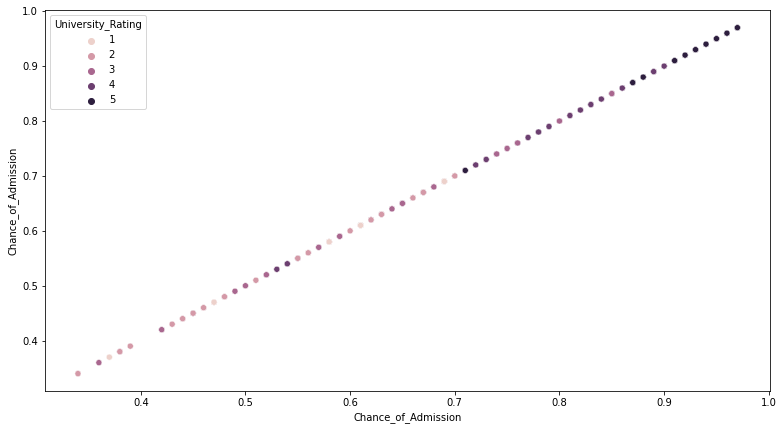

In [ ]:
for i in university_df.columns:
  plt.figure(figsize = (13, 7))
  sns.scatterplot(x = i, y = 'Chance_of_Admission', hue = "University_Rating", hue_norm = (1,5), data = university_df)
  plt.show()

**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
- **Plot the correlation matrix**
- **Comment on the correlation matrix**

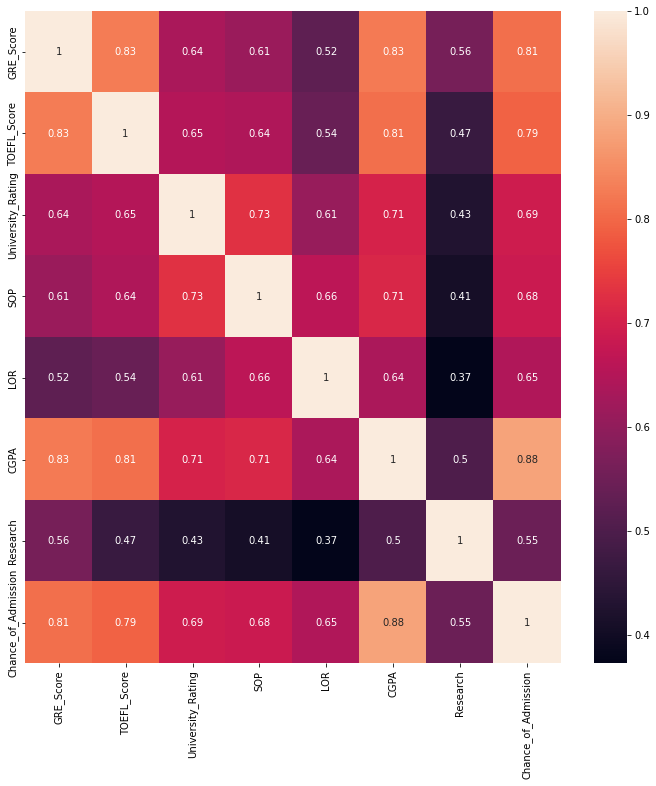

# CODING TASK #3: PREPARE THE DATA BEFORE MODEL TRAINING

In [ ]:
university_df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admission'],
      dtype='object')

In [ ]:
X = university_df.drop(columns = ['Chance_of_Admission'])

In [ ]:
y = university_df['Chance_of_Admission']

In [ ]:
X.shape

(1000, 7)

In [ ]:
y.shape

(1000,)

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
# reshaping the array from (1000,) to (1000, 1)
y = y.reshape(-1,1)
y.shape

(1000, 1)

In [ ]:
# scaling the data before training the model
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler_x = StandardScaler()
# X = scaler_x.fit_transform(X)
# scaler_y = StandardScaler()
# y = scaler_y.fit_transform(y)


**PRACTICE OPPORTUNITY #3 [OPTIONAL]:**
- **Split the data into 25% Testing and 75% Training**
- **Double check that the split was successful by getting the shape of both the training and testing datasets**
- **Why did we comment out the data scaling code cell?**

(750, 7)

(250, 7)

# CODING TASK #4: TRAIN & EVALUATE AN XG-BOOST ALGORITHM

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Train an XGBoost regressor model 

import xgboost as xgb

model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 2, n_estimators = 100)

model.fit(X_train, y_train)

XGBRegressor(max_depth=2, objective='reg:squarederror')

In [ ]:
# predict the score of the trained model using the testing dataset

result = model.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.8489537073971157


In [ ]:
# make predictions on the test data
y_predict = model.predict(X_test)


In [ ]:
y_predict

array([0.59882075, 0.9201697 , 0.7005309 , 0.76330113, 0.91899383,
       0.6954781 , 0.6562695 , 0.5990478 , 0.6458682 , 0.48016107,
       0.58088005, 0.84926975, 0.928981  , 0.56660926, 0.8706842 ,
       0.7790288 , 0.6976224 , 0.6458682 , 0.6898234 , 0.6482874 ,
       0.66614157, 0.8600204 , 0.47550806, 0.690325  , 0.678339  ,
       0.7494707 , 0.7081219 , 0.83217347, 0.65772945, 0.741676  ,
       0.74860334, 0.83911216, 0.564196  , 0.45299277, 0.9443792 ,
       0.49597666, 0.6137044 , 0.72351974, 0.49212682, 0.9506118 ,
       0.6736572 , 0.76937115, 0.5524431 , 0.64817196, 0.67772824,
       0.65772945, 0.82448566, 0.6435934 , 0.9511646 , 0.74528575,
       0.678339  , 0.9044279 , 0.9182702 , 0.7367983 , 0.9477645 ,
       0.5324324 , 0.6417049 , 0.9201697 , 0.7461853 , 0.7313802 ,
       0.94325423, 0.83217347, 0.7538935 , 0.80307746, 0.65003014,
       0.78416204, 0.8622431 , 0.6713048 , 0.7638478 , 0.8127196 ,
       0.9223082 , 0.6292738 , 0.67934865, 0.8685707 , 0.56223

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 0.057 
MSE = 0.0032201870879556825 
MAE = 0.04069434678554535 
R2 = 0.8489537073971157


**PRACTICE OPPORTUNITY #4 [OPTIONAL]:**
- **Retrain the model with less 'max_depth'**
- **Comment on the results**

# FINAL CAPSTONE PROJECT OVERVIEW

- In this hands-on project, we will train a Linear Regression model to predict life expectancy.
- This data was initially obtained from World Health Organization (WHO) and United Nations Website. Data contains features like year, status, life expectancy, adult mortality, infant deaths, percentage of expenditure, alcohol etc.




> 1.   Import the “Life_Expectancy_Data.csv” dataset using Pandas
2. Check if missing values exist in the data, perform feature engineering to eliminate or fill missing values
3. What is the memory usage of the DataFrame
4. List the minimum, average and maximum life expectancy
5. Plot the histogram, pairplot and correlation heatmap for all features 
6. Plot the scatterplot between “Income composition of resources” and “life expectancy”, use “status” for hue attribute. Comment on the plot
7. Plot the scatterplot between “Schooling” and “life expectancy”, use status for hue attribute. Comment on the scatterplot. Comment on the plot
8. Split the data into 80% for training and 20% for testing
9. Train an XG-boost algorithm
10. Assess trained regression model performance, what is R2?
11. Plot trained model predictions vs. ground truth output













# EXCELLENT JOB!

# FINAL CAPSTONE PROJECT SOLUTION

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# read the csv file 
life_expectancy_df = pd.read_csv('Life_Expectancy_Data.csv')
life_expectancy_df

Year      Status  Life expectancy   Adult Mortality  infant deaths  \
0     2015  Developing              65.0            263.0             62   
1     2014  Developing              59.9            271.0             64   
2     2013  Developing              59.9            268.0             66   
3     2012  Developing              59.5            272.0             69   
4     2011  Developing              59.2            275.0             71   
...    ...         ...               ...              ...            ...   
2933  2004  Developing              44.3            723.0             27   
2934  2003  Developing              44.5            715.0             26   
2935  2002  Developing              44.8             73.0             25   
2936  2001  Developing              45.3            686.0             25   
2937  2000  Developing              46.0            665.0             24   

      Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   ...  \
0        0.01               71.279624         65.0      1154   19.1  ...   
1        0.01               73.523582         62.0       492   18.6  ...   
2        0.01               73.219243         64.0       430   18.1  ...   
3        0.01               78.184215         67.0      2787   17.6  ...   
4        0.01                7.097109         68.0      3013   17.2  ...   
...       ...                     ...          ...       ...    ...  ...   
2933     4.36                0.000000         68.0        31   27.1  ...   
2934     4.06                0.000000          7.0       998   26.7  ...   
2935     4.43                0.000000         73.0       304   26.3  ...   
2936     1.72                0.000000         76.0       529   25.9  ...   
2937     1.68                0.000000         79.0      1483   25.5  ...   

      Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0       6.0               8.16         65.0        0.1  584.259210   
1      58.0               8.18         62.0        0.1  612.696514   
2      62.0               8.13         64.0        0.1  631.744976   
3      67.0               8.52         67.0        0.1  669.959000   
4      68.0               7.87         68.0        0.1   63.537231   
...     ...                ...          ...        ...         ...   
2933   67.0               7.13         65.0       33.6  454.366654   
2934    7.0               6.52         68.0       36.7  453.351155   
2935   73.0               6.53         71.0       39.8   57.348340   
2936   76.0               6.16         75.0       42.1  548.587312   
2937   78.0               7.10         78.0       43.5  547.358879   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937     

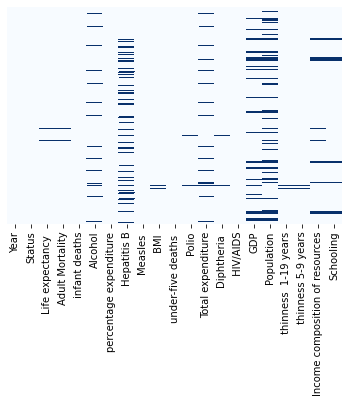

In [ ]:
# check if there are any Null values
sns.heatmap(life_expectancy_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [ ]:
# Check the dataframe info
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [ ]:
# Statistical summary of the dataframe
life_expectancy_df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

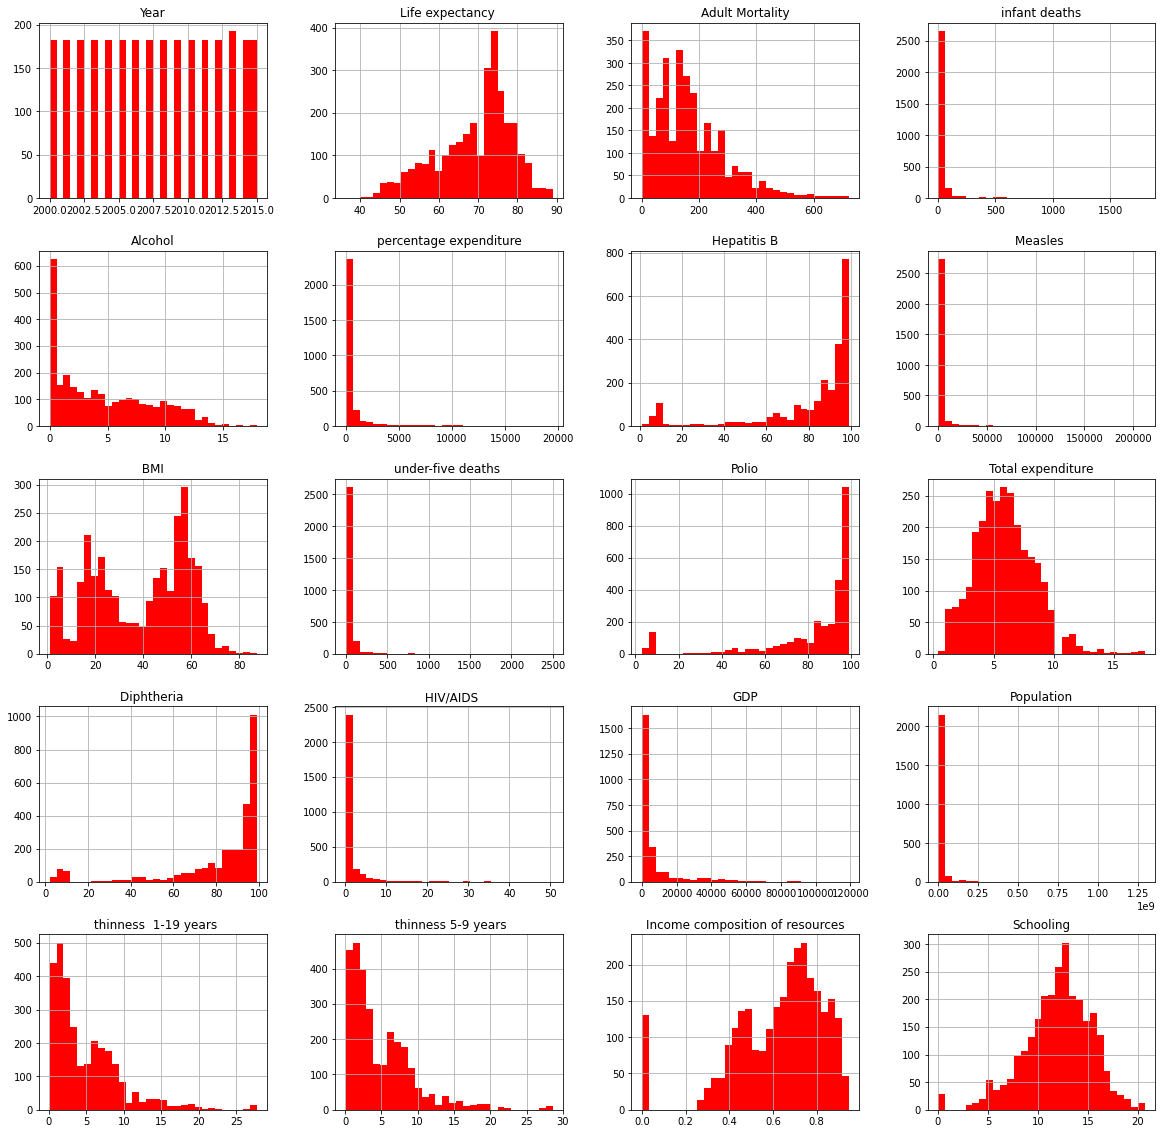

In [ ]:
# Plot the histogram
life_expectancy_df.hist(bins = 30, figsize = (20, 20), color = 'r');

<Figure size 1440x1440 with 0 Axes>

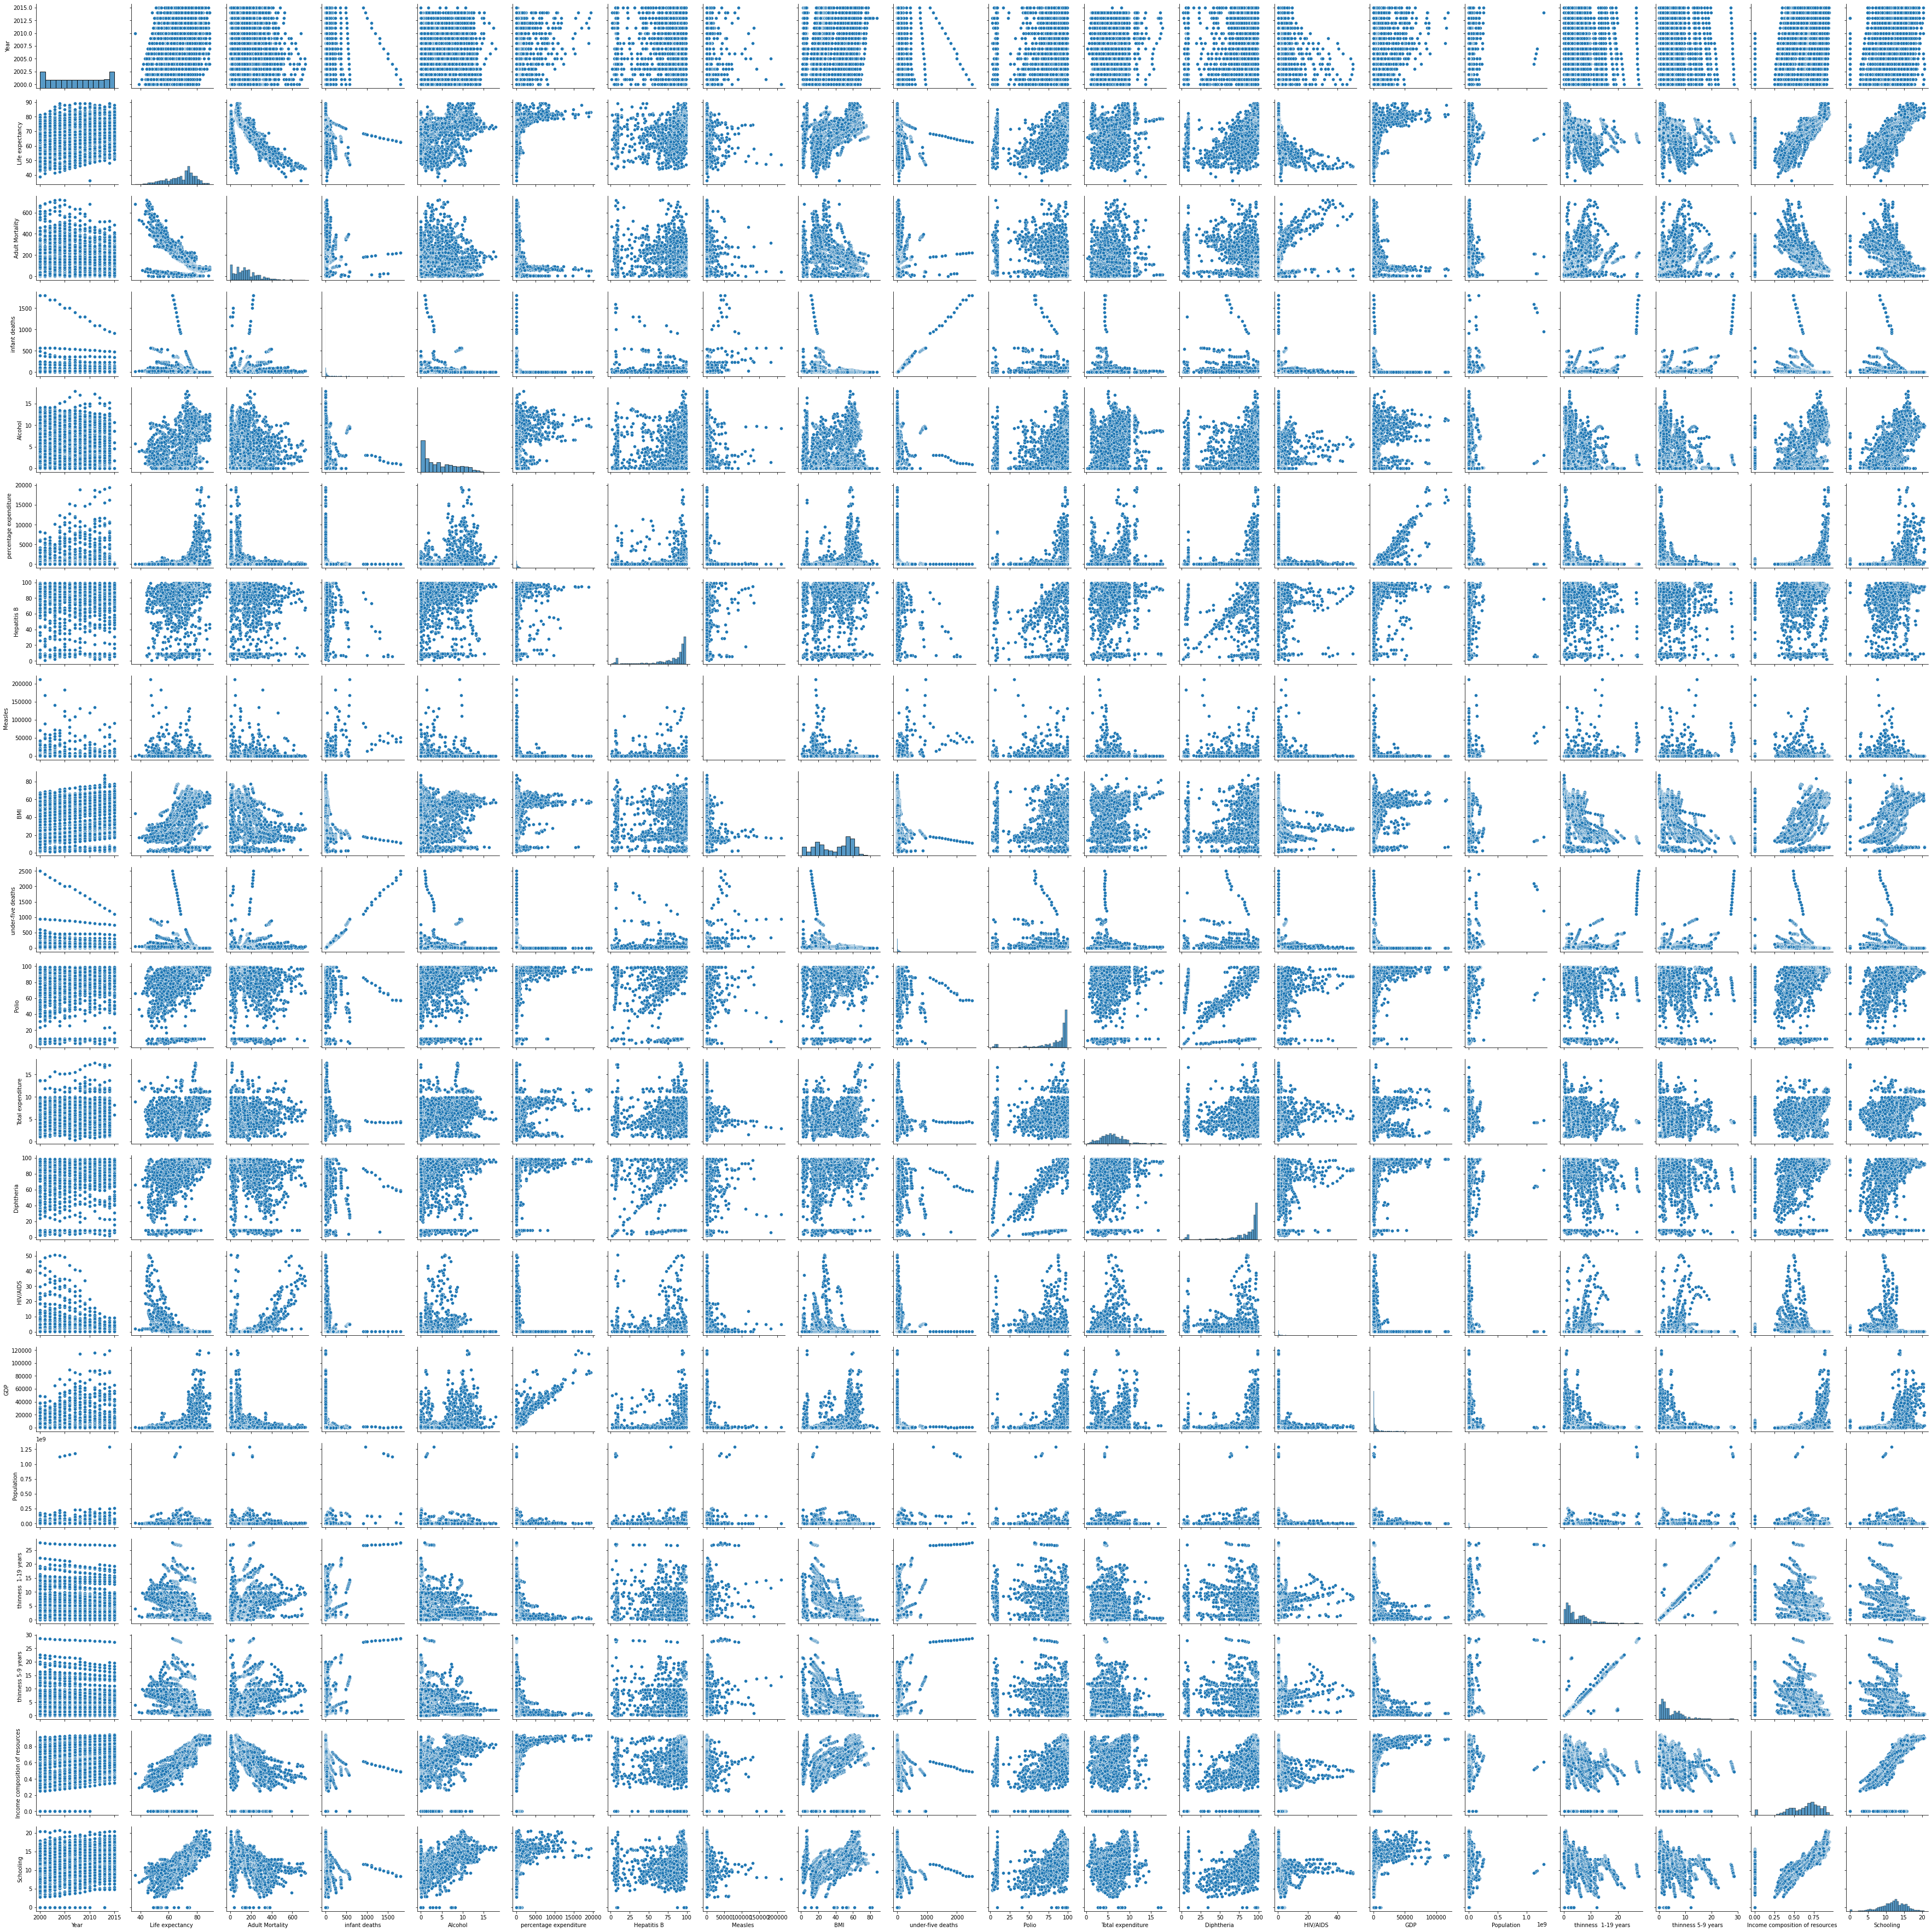

In [ ]:
# Plot pairplot
plt.figure(figsize = (20,20))
sns.pairplot(life_expectancy_df)

In [ ]:
life_expectancy_df

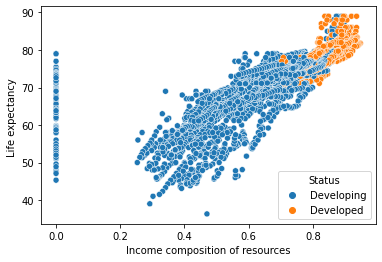

In [ ]:
# Note that there is space after 'Life expectancy '
sns.scatterplot(x = 'Income composition of resources', y = 'Life expectancy ', hue = 'Status', data = life_expectancy_df);


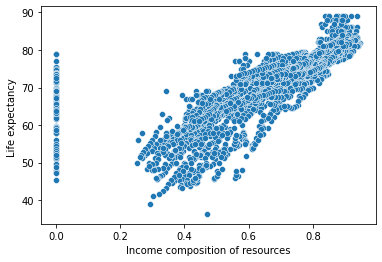

In [ ]:
# Note that there is space after 'Life expectancy '
sns.scatterplot(x = 'Income composition of resources', y = 'Life expectancy ', data = life_expectancy_df);

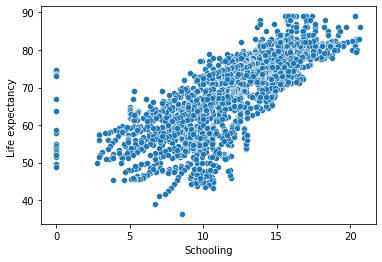

In [ ]:
# Note that there is space after 'Life expectancy '
sns.scatterplot(x = 'Schooling', y = 'Life expectancy ', data = life_expectancy_df);


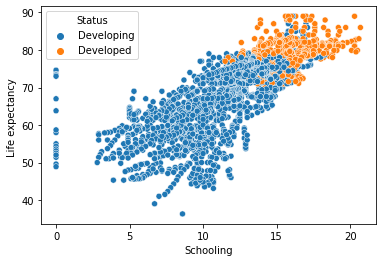

In [ ]:
# Note that there is space after 'Life expectancy '
sns.scatterplot(x = 'Schooling', y = 'Life expectancy ', hue = 'Status', data = life_expectancy_df);


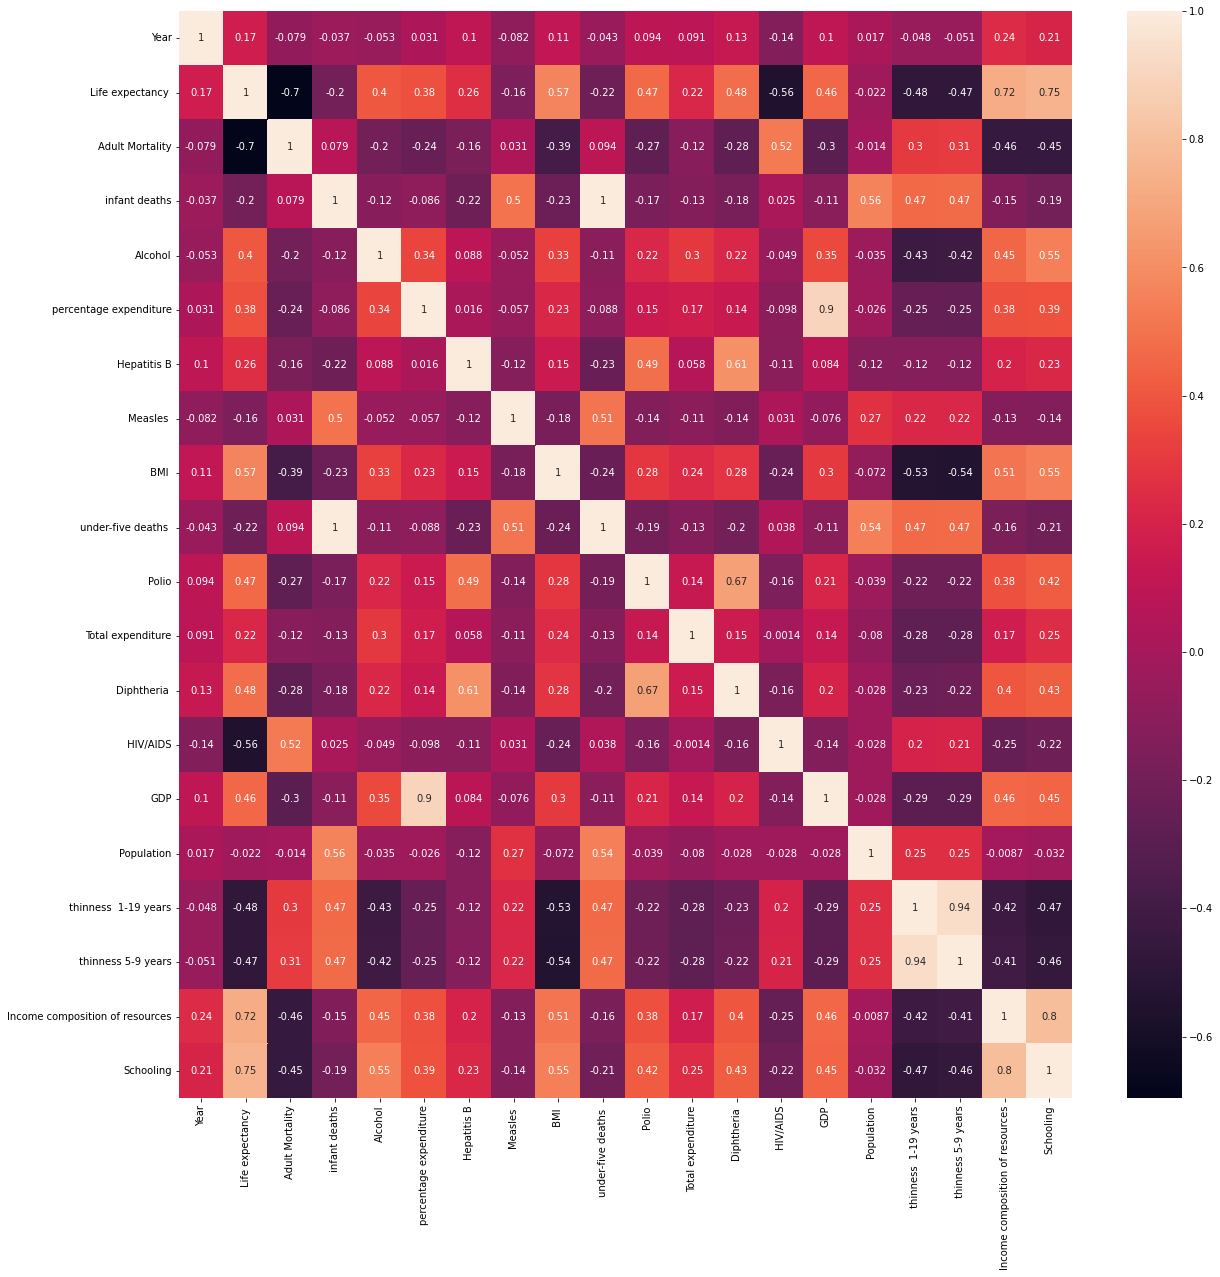

In [ ]:
# Plot the correlation matrix

plt.figure(figsize = (20,20))
corr_matrix = life_expectancy_df.corr()
sns.heatmap(corr_matrix, annot = True)


In [ ]:
life_expectancy_df

Year      Status  Life expectancy   Adult Mortality  infant deaths  \
0     2015  Developing              65.0            263.0             62   
1     2014  Developing              59.9            271.0             64   
2     2013  Developing              59.9            268.0             66   
3     2012  Developing              59.5            272.0             69   
4     2011  Developing              59.2            275.0             71   
...    ...         ...               ...              ...            ...   
2933  2004  Developing              44.3            723.0             27   
2934  2003  Developing              44.5            715.0             26   
2935  2002  Developing              44.8             73.0             25   
2936  2001  Developing              45.3            686.0             25   
2937  2000  Developing              46.0            665.0             24   

      Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   ...  \
0        0.01               71.279624         65.0      1154   19.1  ...   
1        0.01               73.523582         62.0       492   18.6  ...   
2        0.01               73.219243         64.0       430   18.1  ...   
3        0.01               78.184215         67.0      2787   17.6  ...   
4        0.01                7.097109         68.0      3013   17.2  ...   
...       ...                     ...          ...       ...    ...  ...   
2933     4.36                0.000000         68.0        31   27.1  ...   
2934     4.06                0.000000          7.0       998   26.7  ...   
2935     4.43                0.000000         73.0       304   26.3  ...   
2936     1.72                0.000000         76.0       529   25.9  ...   
2937     1.68                0.000000         79.0      1483   25.5  ...   

      Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0       6.0               8.16         65.0        0.1  584.259210   
1      58.0               8.18         62.0        0.1  612.696514   
2      62.0               8.13         64.0        0.1  631.744976   
3      67.0               8.52         67.0        0.1  669.959000   
4      68.0               7.87         68.0        0.1   63.537231   
...     ...                ...          ...        ...         ...   
2933   67.0               7.13         65.0       33.6  454.366654   
2934    7.0               6.52         68.0       36.7  453.351155   
2935   73.0               6.53         71.0       39.8   57.348340   
2936   76.0               6.16         75.0       42.1  548.587312   
2937   78.0               7.10         78.0       43.5  547.358879   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937     

In [ ]:
# Checking the unique values in country to consider it as a categorical variable
life_expectancy_df['Status'].nunique()

2

In [ ]:
# Perform one-hot encoding
life_expectancy_df = pd.get_dummies(life_expectancy_df, columns = ['Status'])

In [ ]:
life_expectancy_df

Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0     2015              65.0            263.0             62     0.01   
1     2014              59.9            271.0             64     0.01   
2     2013              59.9            268.0             66     0.01   
3     2012              59.5            272.0             69     0.01   
4     2011              59.2            275.0             71     0.01   
...    ...               ...              ...            ...      ...   
2933  2004              44.3            723.0             27     4.36   
2934  2003              44.5            715.0             26     4.06   
2935  2002              44.8             73.0             25     4.43   
2936  2001              45.3            686.0             25     1.72   
2937  2000              46.0            665.0             24     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
0                  71.279624         65.0      1154   19.1   
1                  73.523582         62.0       492   18.6   
2                  73.219243         64.0       430   18.1   
3                  78.184215         67.0      2787   17.6   
4                   7.097109         68.0      3013   17.2   
...                      ...          ...       ...    ...   
2933                0.000000         68.0        31   27.1   
2934                0.000000          7.0       998   26.7   
2935                0.000000         73.0       304   26.3   
2936                0.000000         76.0       529   25.9   
2937                0.000000         79.0      1483   25.5   

      under-five deaths   ...  Diphtheria    HIV/AIDS         GDP  Population  \
0                     83  ...         65.0        0.1  584.259210  33736494.0   
1                     86  ...         62.0        0.1  612.696514    327582.0   
2                     89  ...         64.0        0.1  631.744976  31731688.0   
3                     93  ...         67.0        0.1  669.959000   3696958.0   
4                     97  ...         68.0        0.1   63.537231   2978599.0   
...                  ...  ...          ...        ...         ...         ...   
2933                  42  ...         65.0       33.6  454.366654  12777511.0   
2934                  41  ...         68.0       36.7  453.351155  12633897.0   
2935                  40  ...         71.0       39.8   57.348340    125525.0   
2936                  39  ...         75.0       42.1  548.587312  12366165.0   
2937                  39  ...         78.0       43.5  547.358879  12222251.0   

       thinness  1-19 years   thinness 5-9 years  \
0                      17.2                 17.3   
1                      17.5                 17.5   
2                      17.7                 17.7   
3                      17.9                 18.0   
4                      18.2                 18.2   
...                     ...                  ...   
2933                    9.4                  9.4   
2934                    9.8                  9.9   
2935                    1.2                  1.3   
2936                    1.6                  1.7   
2937                   11.0                 11.2   

      Income composition of resources  Schooling  Status_Developed  \
0                               0.479       10.1                 0   
1                               0.476       10.0                 0   
2                               0.470        9.9                 0   
3                               0.463        9.8                 0   
4                               0.454        9.5                 0   
...                               ...        ...               ...   
2933                            0.407        9.2                 0   
2934                            0.418        9.5                 0   
2935                            0.427       10.0                 0   
2936                            0.427        9.8                 0   
2937            

In [ ]:
# Check the number of null values for the columns having null values
life_expectancy_df.isnull().sum()[np.where(life_expectancy_df.isnull().sum() != 0)[0]]


Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
# Since most of the are continous values we fill them with mean
life_expectancy_df = life_expectancy_df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [ ]:
life_expectancy_df.isnull().sum()[np.where(life_expectancy_df.isnull().sum() != 0)[0]]

Series([], dtype: int64)

In [ ]:
# Create train and test data

X = life_expectancy_df.drop(columns = ['Life expectancy '])
y = life_expectancy_df[['Life expectancy ']]


In [ ]:
X

Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0     2015            263.0             62     0.01               71.279624   
1     2014            271.0             64     0.01               73.523582   
2     2013            268.0             66     0.01               73.219243   
3     2012            272.0             69     0.01               78.184215   
4     2011            275.0             71     0.01                7.097109   
...    ...              ...            ...      ...                     ...   
2933  2004            723.0             27     4.36                0.000000   
2934  2003            715.0             26     4.06                0.000000   
2935  2002             73.0             25     4.43                0.000000   
2936  2001            686.0             25     1.72                0.000000   
2937  2000            665.0             24     1.68                0.000000   

      Hepatitis B  Measles    BMI   under-five deaths   Polio  ...  \
0            65.0      1154   19.1                  83    6.0  ...   
1            62.0       492   18.6                  86   58.0  ...   
2            64.0       430   18.1                  89   62.0  ...   
3            67.0      2787   17.6                  93   67.0  ...   
4            68.0      3013   17.2                  97   68.0  ...   
...           ...       ...    ...                 ...    ...  ...   
2933         68.0        31   27.1                  42   67.0  ...   
2934          7.0       998   26.7                  41    7.0  ...   
2935         73.0       304   26.3                  40   73.0  ...   
2936         76.0       529   25.9                  39   76.0  ...   
2937         79.0      1483   25.5                  39   78.0  ...   

      Diphtheria    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0            65.0        0.1  584.259210  33736494.0                   17.2   
1            62.0        0.1  612.696514    327582.0                   17.5   
2            64.0        0.1  631.744976  31731688.0                   17.7   
3            67.0        0.1  669.959000   3696958.0                   17.9   
4            68.0        0.1   63.537231   2978599.0                   18.2   
...           ...        ...         ...         ...                    ...   
2933         65.0       33.6  454.366654  12777511.0                    9.4   
2934         68.0       36.7  453.351155  12633897.0                    9.8   
2935         71.0       39.8   57.348340    125525.0                    1.2   
2936         75.0       42.1  548.587312  12366165.0                    1.6   
2937         78.0       43.5  547.358879  12222251.0                   11.0   

       thinness 5-9 years  Income composition of resources  Schooling  \
0                    17.3                            0.479       10.1   
1                    17.5                            0.476       10.0   
2                    17.7                            0.470        9.9   
3                    18.0                            0.463        9.8   
4                    18.2                            0.454        9.5   
...                   ...                              ...        ...   
2933                  9.4                            0.407        9.2   
2934                  9.9                            0.418        9.5   
2935                  1.3                            0.427       10.0   
2936                  1.7                            0.427        9.8   
2937                 11.2                            0.434        9.8   

      Status_Developed  Status_Developing  
0                    0                  1  
1                    0                  1  
2                    0                  1  
3                    0                  1  
4                    0                  1  
...                ...                ...  
2933                 0                  1  
2934                 0                

In [ ]:
y

Life expectancy 
0                 65.0
1                 59.9
2                 59.9
3                 59.5
4                 59.2
...                ...
2933              44.3
2934              44.5
2935              44.8
2936              45.3
2937              46.0

[2938 rows x 1 columns]

In [ ]:
X.shape

(2938, 21)

In [ ]:
y.shape

(2938, 1)

In [ ]:
# Convert the data type to float32

X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [ ]:
# Only take the numerical variables and scale them
X 

array([[2.015e+03, 2.630e+02, 6.200e+01, ..., 1.010e+01, 0.000e+00,
        1.000e+00],
       [2.014e+03, 2.710e+02, 6.400e+01, ..., 1.000e+01, 0.000e+00,
        1.000e+00],
       [2.013e+03, 2.680e+02, 6.600e+01, ..., 9.900e+00, 0.000e+00,
        1.000e+00],
       ...,
       [2.002e+03, 7.300e+01, 2.500e+01, ..., 1.000e+01, 0.000e+00,
        1.000e+00],
       [2.001e+03, 6.860e+02, 2.500e+01, ..., 9.800e+00, 0.000e+00,
        1.000e+00],
       [2.000e+03, 6.650e+02, 2.400e+01, ..., 9.800e+00, 0.000e+00,
        1.000e+00]], dtype=float32)

In [ ]:
# split the data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score

In [ ]:
# Train an XGBoost regressor model 

import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 30, n_estimators = 100)
model.fit(X_train, y_train)

XGBRegressor(max_depth=30, objective='reg:squarederror')

In [ ]:
model_accuracy = model.score(X_test, y_test)
model_accuracy

0.9661294888697959

In [ ]:
# Make prediction

y_predict = model.predict(X_test)
y_predict

array([62.52194 , 56.36571 , 62.773277, 73.71851 , 46.66484 , 70.430626,
       76.670204, 69.48251 , 80.807526, 75.64431 , 83.53633 , 75.50888 ,
       61.099995, 75.09346 , 81.37544 , 73.99048 , 52.92135 , 81.70575 ,
       67.24464 , 66.429886, 77.15362 , 65.27626 , 72.11285 , 51.159554,
       71.039734, 75.35604 , 67.83284 , 81.17061 , 77.93824 , 75.39691 ,
       72.70267 , 74.89005 , 72.1699  , 77.18662 , 58.54552 , 78.266945,
       68.45911 , 62.534344, 82.009346, 75.791115, 58.706272, 72.94676 ,
       62.512436, 53.88766 , 75.76117 , 73.31381 , 78.399284, 75.55886 ,
       72.442154, 76.237434, 73.46291 , 75.27438 , 80.535995, 52.992825,
       65.92901 , 67.62289 , 56.31751 , 74.80786 , 70.514885, 72.22527 ,
       75.524345, 65.75822 , 58.191563, 70.88846 , 73.98861 , 72.74965 ,
       73.722115, 65.26665 , 72.50851 , 60.9727  , 67.89791 , 78.17522 ,
       82.81859 , 81.266556, 68.71874 , 44.94089 , 58.649742, 71.64288 ,
       72.39573 , 79.982216, 63.665733, 63.537727, 

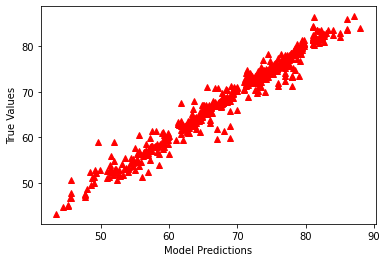

In [ ]:
# Plot the scaled result

plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.show()

In [ ]:
# Plot the KPIs

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 1.678 
MSE = 2.8149812 
MAE = 1.0648535 
R2 = 0.9661294888697959 
Adjusted R2 = 0.9648728091282158


# PRACTICE OPPORTUNITIES SOLUTIONS

**PRACTICE OPPORTUNITY #1 SOLUTION:**
- **What is highest, average and lowest TOEFL score in this dataset?**

In [ ]:
university_df.describe()

**PRACTICE OPPORTUNITY #2 SOLUTION:**
- **Plot the correlation matrix**
- **Comment on the correlation matrix**

In [ ]:
corr_matrix = university_df.corr()

plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True)
plt.show()
# From the correlation matrix, it can be seen that, all parameters have positive correlation with chance of getting admission in to the university.

**PRACTICE OPPORTUNITY #3 SOLUTION:**
- **Split the data into 25% Testing and 75% Training**
- **Double check that the split was successful by getting the shape of both the training and testing datasets**

In [ ]:
# spliting the data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

**PRACTICE OPPORTUNITY #4 SOLUTION:**
- **Retrain the model with less 'max_depth'**
- **Comment on the results**

In [ ]:
# Results with Max Depth = 5
# RMSE = 0.276 
# MSE = 0.07632221319529037 
# MAE = 0.17581288216704305 
# R2 = 0.9290579776021098 
# Adjusted R2 = 0.925560835652918

# Results with Max Depth = 2
# RMSE = 0.413 
# MSE = 0.17077215477193608 
# MAE = 0.2740720681769204 
# R2 = 0.8412661069226667 
# Adjusted R2 = 0.8334411967005446